# Введение в генеративно-состязательные сети

**Генеративно-состязательные сети** (Generative Adversarial Networks, GAN), впервые представленные в 2014 году Яном Гудфеллоу (Ian Goodfellow) и его коллегами, — альтернатива вариационным автокодировщикам, позволяющая выделять скрытые пространства изображений. Они позволяют генерировать очень реалистичные искусственные изображения, статистически неотличимые от настоящих.

Чтобы проще было понять суть генеративно-состязательной сети, вообразите фальсификатора, пытающегося подделать картину Пикассо. Сначала он довольно плохо справляется с задачей. Он показывает свои подделки вместе с подлинниками Пикассо продавцу произведений искусства. Продавец оценивает подлинность картин и рассказывает фальсификатору, какие детали делают картину похожей на картину Пикассо. Фальсификатор возвращается в мастерскую и создает несколько новых подделок. С течением времени фальсификатор становится все более компетентным в имитации стиля Пикассо, а продавец — все более опытным в различении подделок. В конце концов у них на руках оказываются превосходные подделки Пикассо.

**Вот что такое генеративно-состязательная сеть**: она состоит из двух сетей — выполняющей подделку и оценивающей эту подделку, постепенно обучающих друг друга:

**сеть-генератор** — получает на входе случайный вектор (случайную точку в скрытом пространстве) и декодирует его в искусственное изображение;

**сеть-дискриминатор** (или противник) — получает изображение (настоящее или поддельное) и определяет, взято ли это изображение из обучающего набора или сгенерировано сетью-генератором.

**Сеть-генератор** обучается обманывать сеть-дискриминатор и, соответственно, учится создавать все более реалистичные изображения: поддельные изображения, неотличимые от настоящих в той мере, на какую способна сеть-дискриминатор (рис.1 ).

**Сеть-дискриминатор**, в свою очередь, постоянно адаптируется к увеличивающейся способности сети-генератора и устанавливает все более высокую планку реализма для генерируемых изображений. По окончании обучения генератор способен превратить любую точку из своего входного пространства в правдоподобное изображение.

Примечательно, что генеративно-состязательная сеть (GAN) — это система, в которой минимум оптимизации не фиксирован, в отличие от любых других обучаемых конфигураций. Обычно градиентный спуск заключается в постепенном скатывании вниз по холмам статического ландшафта потерь. Однако в случае с GAN каждый шаг вниз по склону немного меняет весь ландшафт. Это динамическая система, в которой процесс оптимизации стремится не к минимуму, а к равновесию двух сил. По этой причине генеративно-состязательные сети трудно поддаются обучению: чтобы получить действующую генеративно-состязательную сеть, требуется приложить большие усилия по настройке архитектуры модели и параметров обучения.

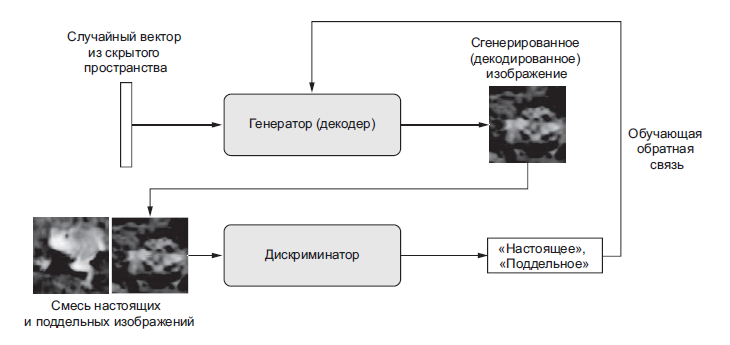

Рис 1.  Генератор преобразует случайные скрытые векторы в изображения, а дискриминатор стремится отличить настоящие изображения от сгенерированных искусственно. Генератор обучается обманывать дискриминатор

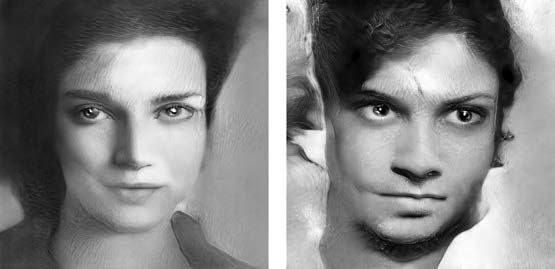

Рис. 2. Скрытое пространство жителей. Изображения сгенерированы Майком Тикой (Mike Tyka) с использованием многоступенчатой генеративно-состязательной сети, обученной на наборе изображений лиц (www.miketyka.com)

В общих чертах GAN выглядит примерно так:

1.
Сеть generator отображает векторы с формой (размерность_скрытого_пространства,) в изображения с формой (32, 32, 3).

2.
Сеть discriminator отображает изображения с формой (32, 32, 3) в оценку вероятности того, что изображение является настоящим.

3.
Сеть gan объединяет генератор и дискриминатор gan(x) = discriminator(generator(x)). То есть сеть gan отображает скрытое пространство векторов в оценку реализма этих скрытых векторов, декодированных генератором.

4.
Мы обучим дискриминатор на примерах реальных и искусственных изображений, отмеченных метками «настоящее»/«поддельное», как самую обычную модель классификации изображений.

5.
Для обучения генератора мы используем градиенты весов генератора в отношении потерь модели gan. То есть на каждом шаге мы будем смещать веса генератора в направлении увеличения вероятности классификации дискриминатором изображений, декодированных генератором как «настоящие». Иными словами, мы будем обучать генератор обманывать дискриминатор.

# Генератор

***Модель generator преобразует выбранный случайно вектор*** (из скрытого пространства, полученного во время обучения)  в изображение-кандидат. Одна из многих проблем, которые часто возникают в сетях GAN, — генератор создает изображения, которые выглядят как шум. Одно из возможных решений — использовать прореживание Dropout в дискриминаторе и генераторе.

# Дискриминатор

**Модель discriminator**   принимает на входе изображение-кандидат (реальное или искусственное) и относит его к одному из двух классов: «подделка» или «настоящее, имеющееся в обучающем наборе».

# Состязательная сеть

***Перейдем к состязательной сети***, объединяющей генератор и дискриминатор. В процессе обучения эта модель будет смещать веса генератора в направлении увеличения способности обмана дискриминатора. Эта модель преобразует точки скрытого пространства в классифицирующее решение — «подделка» или «настоящее» — и предназначена для обучения с метками, которые всегда говорят: «это настоящие изображения». То есть обучение gan будет смещать веса в модели generator так, чтобы увеличить вероятность получить от дискриминатора ответ «настоящее», когда тот будет просматривать поддельное изображение. Важно также отметить, что дискриминатор нужно «заморозить» на время обучения (отключить его обучение): его веса не должны обновляться при обучении gan. В противном случае все сведется к тому, что вы обучите дискриминатор всегда отвечать «настоящее», а это едва ли вам нужно!

# Как обучить сеть

Теперь можно приступать к обучению. Ниже схематически описывается общий цикл обучения.
 В каждой эпохе нужно выполнить следующие действия:

1.
Извлечь случайные точки из скрытого пространства (случайный шум).

2.
Создать изображения с помощью генератора, использовав случайный шум.

3.
Смешать сгенерированные изображения с настоящими.

4.
Обучить дискриминатор на этом смешанном наборе изображений, добавив соответствующие цели: «настоящее» (для настоящих изображений) или «подделка» (для сгенерированных изображений).

5.
Выбрать новые случайные точки из скрытого пространства.

6.
Обучить gan, использовав эти случайные векторы, с целями, которые всегда говорят: «это настоящие изображения». Это приведет к смещению весов генератора (и только генератора, потому что внутри gan дискриминатор «замораживается») в направлении, увеличивающем вероятность получить от дискриминатора ответ «настоящее» для сгенерированных изображений: это научит генератор обманывать дискриминатор.

В ходе обучения можно заметить, что потери состязательной сети значительно возрастают, а потери дискриминатора стремятся к нулю — дискриминатор может оказаться в доминирующим положении над генератором. В этом случае попробуйте уменьшить скорость обучения дискриминатора и увеличить его коэффициент прореживания.

# Подведение итогов


*   Генеративно-состязательная сеть состоит из двух сетей: генератора и дискриминатора. Дискриминатор обучается отличать изображения, созданные генератором, от настоящих, имеющихся в обучающем наборе, а генератор обучается обманывать дискриминатор. Примечательно, что генератор вообще не видит изображений из обучающего набора; вся информация, которую он имеет, поступает из дискриминатора.

*   Генеративно-состязательные сети сложны в обучении, потому что обучение GAN — это динамический процесс, отличный от обычного процесса градиентного спуска по фиксированному ландшафту потерь. Для правильного обучения  GAN приходится использовать ряд эвристических трюков, а также уделять большое внимание настройкам.

*   Генеративно-состязательные сети потенциально способны производить очень реалистичные изображения. Однако в отличие от вариационных автокодировщиков получаемое ими скрытое пространство не имеет четко выраженной непрерывной структуры, и поэтому они могут не подходить для некоторых практических применений, таких как редактирование изображений с использованием концептуальных векторов.


-----------------------------------------------------------------------------------------------------------------------

# Практическая часть. Создание простой генеративно-состязательной сети для генерации рукописных цифр

# Простая порождающая состязательная сеть на базе библиотеки Keras

Теперь, когда вы понимаете, что такое GAN и их основные компоненты, мы можем приступить к написанию очень простого кода. Вы будете использовать, Keras.
Вы будете использовать matplotlib для построения графиков, tensorflow в качестве внутренней библиотеки Keras, и tqdm для показа причудливого индикатора выполнения для каждой эпохи (итерации).

Следующим шагом является создание скрипта Python. В этом сценарии вам сначала нужно будет импортировать все модули и функции, которые вы будете использовать. Объяснение каждого будет дано, поскольку они используются.

In [ ]:
# Загрузка библиотек
import os

# This guide can only be run with the TF backend.
os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import layers
import numpy as np
from keras import ops
import matplotlib.pyplot as plt
import gdown
from zipfile import ZipFile

In [ ]:
random_dim = 128

Подведение итогов: пример сквозной сети GAN Давайте рассмотрим подробный пример, который использует все, что вы только что узнали.

Давайте рассмотрим:

Генераторная сеть, предназначенная для генерации изображений размером 28x28x1. Дискриминаторная сеть, предназначенная для классификации изображений размером 28x28x1 на два класса («поддельные» и «настоящие»). По одному оптимизатору на каждый. Функция потерь для обучения дискриминатора.

Прежде чем вы сможете начать строить дискриминатор и генератор, вы должны сначала собрать и предварительно обработать данные.

Теперь вы можете создавать свои сети генератора и дискриминатора. Вы будете использовать оптимизатор Adam для обеих сетей. Как для генератора, так и для дискриминатора вы создадите нейронную сеть с тремя скрытыми слоями, в которой функция активации - это Leaky Relu . Вы также должны добавить  слои  DropOut для дискриминатора, чтобы улучшить его устойчивость на невидимых изображениях.

In [ ]:
# Создаем дискриминатор
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

#Создаем генератор
latent_dim = 128
generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        # Мы хотим сгенерировать 128 коэффициентов
        # для преобразования в карту 7x7x128.
        layers.Dense(7 * 7 * 128),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

Вот полнофункциональный класс GAN, переопределяющий compile()использование собственной сигнатуры и реализующий весь алгоритм GAN в 17 строках train_step:

In [ ]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_loss_tracker = keras.metrics.Mean(name="d_loss")
        self.g_loss_tracker = keras.metrics.Mean(name="g_loss")
        self.seed_generator = keras.random.SeedGenerator(1337)

    @property
    def metrics(self):
        return [self.d_loss_tracker, self.g_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Расшифруйте их в поддельные изображения
        generated_images = self.generator(random_latent_vectors)

        # Сочетайте их с реальными изображениями
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Создайте ярлыки, отличающие настоящие изображения от поддельных
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Добавьте случайный шум к надписям - важный трюк!
        labels += 0.05 * keras.random.uniform(
            tf.shape(labels), seed=self.seed_generator
        )

        # Обучите распознавателя
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply(grads, self.discriminator.trainable_weights)

        # Выборка случайных точек в скрытом пространстве
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Соберите ярлыки с надписью "все реальные изображения".
        misleading_labels = tf.zeros((batch_size, 1))

        # Обучите генератор (обратите внимание, что мы не должны * не * обновлять веса дискриминатора)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply(grads, self.generator.trainable_weights)

        # Обновите показатели и верните их значение.
        self.d_loss_tracker.update_state(d_loss)
        self.g_loss_tracker.update_state(g_loss)
        return {
            "d_loss": self.d_loss_tracker.result(),
            "g_loss": self.g_loss_tracker.result(),
        }

Давайте проведем тест-драйв:

In [ ]:
# Подготовка датасета. Мы используем оба и обучающий и
# тестовый Mnist наборы вместе.
batch_size = 64
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
dataset = tf.data.Dataset.from_tensor_slices(all_digits)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Если нужно продолжить обучение,
то загрузите полученную ранее модель.

In [ ]:
generator = keras.saving.load_model("/content/drive/MyDrive/gMnist20.keras")
#gan = keras.saving.load_model("/content/drive/MyDrive/gan%d.keras" % (i))

# Создание gan и подготовка к обучению

In [ ]:
gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

# Запускаем на обучение

In [ ]:
# В силу ограниченного времени, предоставляемого GoogleColab,
# вы можете обучать на части датасета и уменьшить число эпох
# более менее хороший результат получается при числе эпох больше 20.
gan.fit(dataset, epochs=105)

Epoch 1/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - d_loss: 0.4960 - g_loss: 1.2567
Epoch 2/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - d_loss: 0.1383 - g_loss: 3.7732
Epoch 3/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - d_loss: 0.7678 - g_loss: 1.0225
Epoch 4/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - d_loss: 0.6661 - g_loss: 0.9731
Epoch 5/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - d_loss: 0.6411 - g_loss: 1.0140
Epoch 6/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - d_loss: 0.6300 - g_loss: 0.9783
Epoch 7/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - d_loss: 0.6507 - g_loss: 0.9427
Epoch 8/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - d_loss: 0.6089 - g_loss: 1.0781
Epoch 9/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - d_loss: 0.6087 - g_loss: 1.0410
Epoch 10/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - d_loss: 0.6009 - g_loss: 1.0249
Epoch 11/105
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - d_loss: 0.7004 - g_loss: 1.01

Для полноты вы можете создать функцию, которая будет сохранять ваши сгенерированные изображения каждые 20 эпох. Так как это не является основой этого урока, вам не нужно полностью понимать функцию.

In [ ]:
#Функция1 вывода изображений с выхода генератора generator_new
def gen_work(generator_new):
    random_latent_vectors = keras.random.normal(
                shape=(100, 128)
            )
    generated_images = generator_new(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    fig = plt.figure(figsize=(10,10))
    for i in range(100):
        plt.subplot(10,10, i+1)
        img = keras.utils.array_to_img(generated_images[i])
        plt.imshow(img)
        plt.axis("off")
    plt.show()

In [ ]:
# #Функция2 вывода изображений с выхода генератора generator
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')

    plt.tight_layout()
    plt.title('gan_generated_image_epoch_%d.png' % epoch,fontsize=20)
    #plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

# Посмотреть работу генераторов

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step


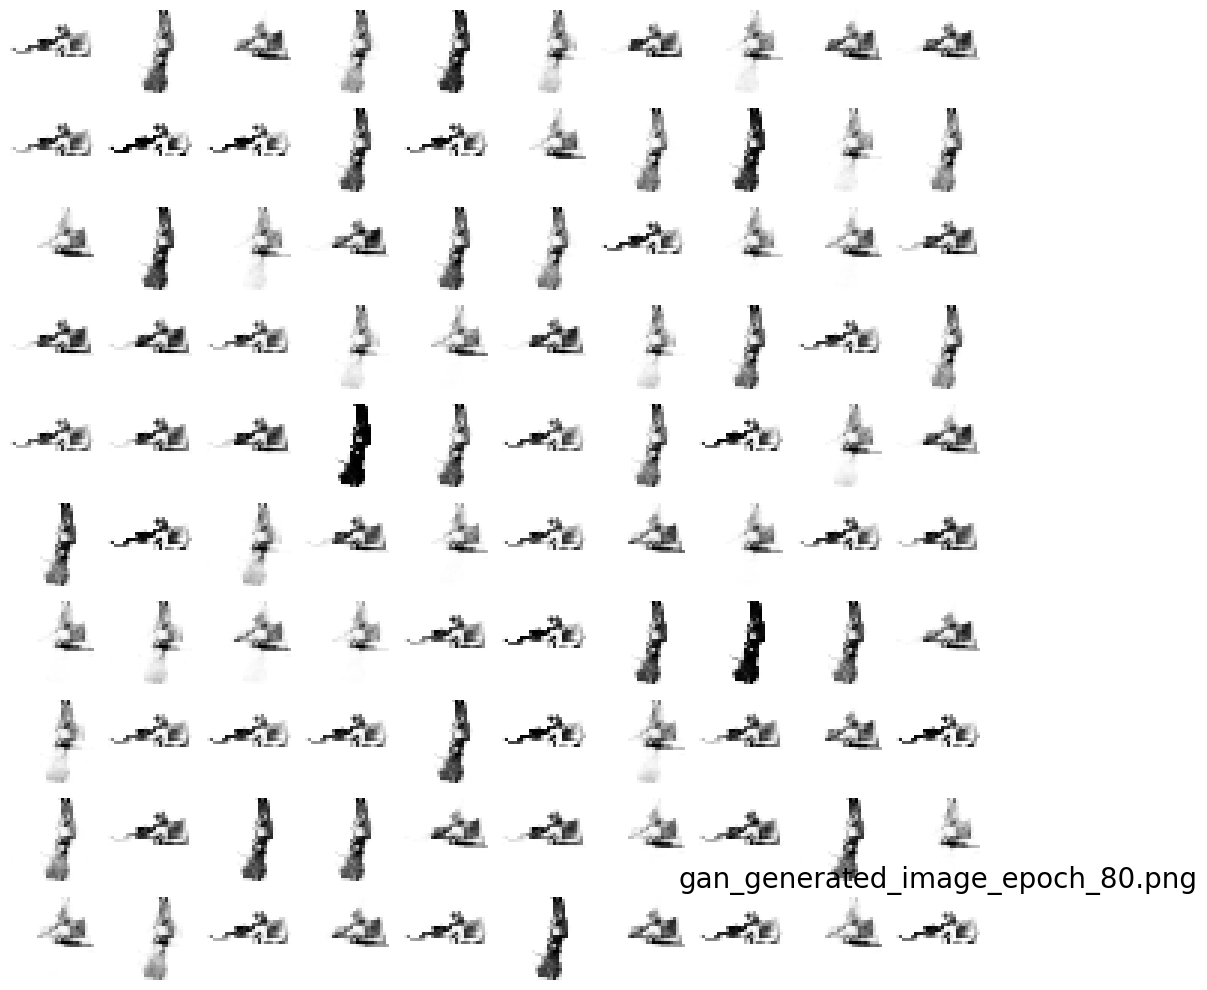

In [ ]:
# Генератор из прежнего кода
generator = gan.generator
plot_generated_images(80, generator, examples=100, dim=(10, 10), figsize=(10, 10))




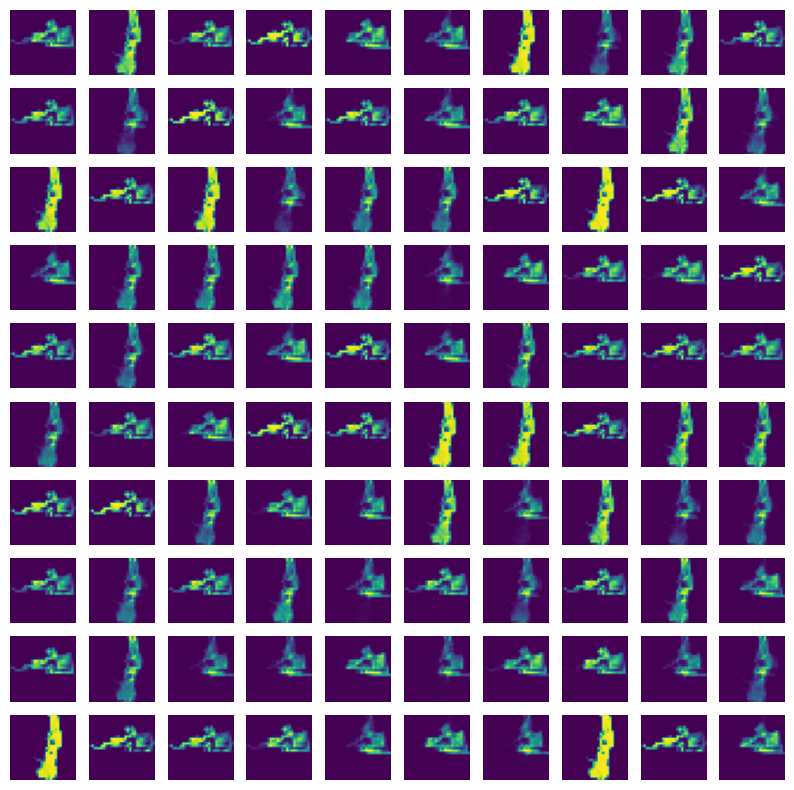

In [ ]:
# Другая процедура вывода изображений
gen_work(gan.generator)

# Сохранить модель генератора в памяти Google disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
i=1
gan.generator.save("/content/drive/MyDrive/gMnist105.keras")

# Задание

1. Выполнить ноутбук при числе эпох обучения 105,205,400, сравнить качество сгенерированных изображений во всех случаях.
2. Применить ГАН к набору данных Fashion_Mnist
3. Дать как можно более полные комментарии к программной части, поясняющие процесс обучения ГАН

# Вопросы

1. Для чего предназначены и какие функции выполняют генеративно-состязательные нейронные сети (ГАН)?
2. Какова структура ГАН, из каких частей состоит ГАН?
3. Что такое сеть-генератор и сеть-дискриминатор? Каковы их функции?
4. Что изменяется в ГАН в процессе обучения?
5. Какая цель преследуется при обучении ГАН?
6. Какой метод используется для поиска значений весовых коэффициентов?
7. Как обучить генеративно-состязательную сеть? Опишите общий цикл обучения по шагам.
8. При обучении дискриминатора что в обучающей выборке является входом X и эталоном выхода Y?
9. При обучении дискриминатора в каком состоянии находится генератор?
10. Опишите процесс обучения генератора. Из каких пар  Вход X - Эталон выхода Y состоит обучающая выборка.
11. В каком состоянии при обучении генератора находится дискриминатор?
12. С какими трудностями приходится сталкиваться при обучении генеративно-состязательных нейронных сетей?